### Species accumulation through time

In [6]:
import pandas as pd
df = pd.read_csv('../data/type_localities_Bolivian_fishes.txt', sep='\t', encoding='latin-1')
print(df)

      nr.  year                 original_name  \
0     NaN  1846              Ovestias cuvieri   
1    30.0  1846            Orestias humboldti   
2    27.0  1846                Orestias albus   
3    37.0  1846               Orestias luteus   
4    40.0  1846           Orestias pentlandii   
..    ...   ...                           ...   
205  56.0  2022         Moema juanderibaensis   
206  11.0  2023            Bujurquina mabelae   
207  10.0  2023          Bujurquina beniensis   
208  53.0  2023           Moema beltramonorum   
209  84.0  2023  Bryconamericus parapetiensis   

                                        author name_category  \
0                            Valenciennes 1846         valid   
1                            Valenciennes 1846       synonym   
2                            Valenciennes 1846         valid   
3                            Valenciennes 1846         valid   
4                            Valenciennes 1846         valid   
..                         

[7, 1, 5, 1, 3, 1, 1, 1, 6, 6, 1, 6, 1, 3, 4, 5, 1, 1, 28, 1, 2, 3, 16, 1, 4, 6, 1, 1, 1, 1, 2, 1, 2, 1, 3, 1, 4, 3, 3, 3, 2, 1, 1, 2, 1, 2, 1, 3, 6, 2, 7, 1, 3, 3, 2, 1, 2, 3, 4, 3, 2, 4, 4, 2, 1, 1, 4]
[7, 8, 13, 14, 17, 18, 19, 20, 26, 32, 33, 39, 40, 43, 47, 52, 53, 54, 82, 83, 85, 88, 104, 105, 109, 115, 116, 117, 118, 119, 121, 122, 124, 125, 128, 129, 133, 136, 139, 142, 144, 145, 146, 148, 149, 151, 152, 155, 161, 163, 170, 171, 174, 177, 179, 180, 182, 185, 189, 192, 194, 198, 202, 204, 205, 206, 210]
[1923, 1924, 1925, 1927, 1929, 1940, 1942, 1943, 1944, 1966, 1968, 1969, 1972, 1973, 1846, 1975, 1976, 1978, 1981, 1854, 1855, 1982, 1983, 1858, 1984, 1985, 1987, 1988, 1989, 1990, 1991, 1996, 1997, 1999, 2001, 2002, 2003, 1876, 2004, 1878, 2005, 2006, 2007, 2008, 2009, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 1892, 2020, 2022, 2023, 1896, 1897, 1904, 1907, 1911, 1912, 1915, 1916, 1917, 1918]


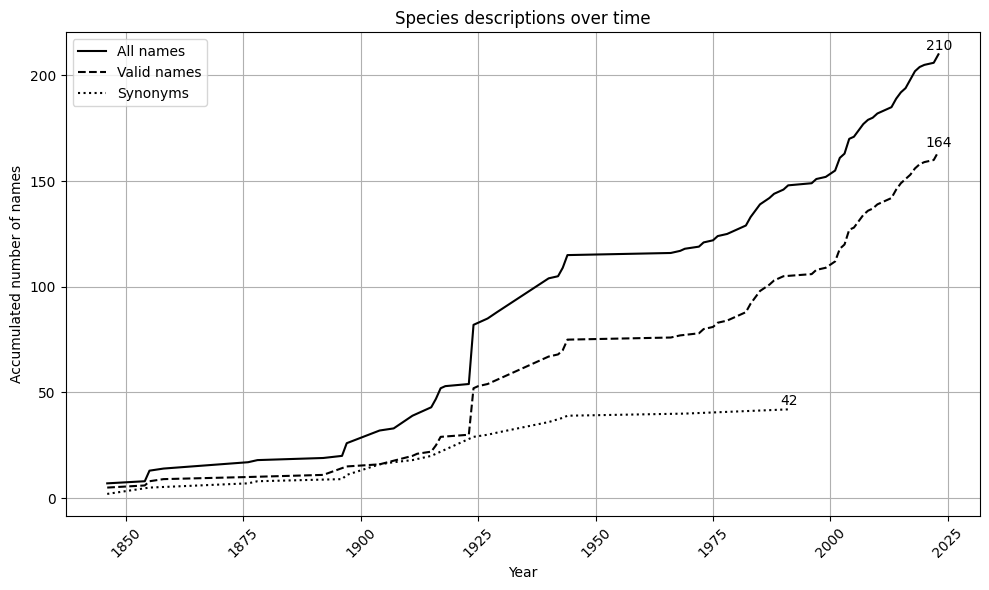

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/type_localities_Bolivian_fishes.txt', sep='\t', encoding='latin-1')

def count_occurrences(array):
  """Counts the occurrences of each number in an array and returns them as a list.

  Args:
      array: A list of elements.

  Returns:
      A list where the indices represent the unique elements and the values represent their counts.
  """
  counts = {}
  for num in array:
    if num in counts:
      counts[num] += 1
    else:
      counts[num] = 1
  return list(counts.values())  # Convert dictionary values to a list

# Example usage
array = df['year']
counts = count_occurrences(array)

print(counts)
# Calculate year-wise accumulation (optional, since data already has accumulated count)
cumulative_sum = []
total = 0

for num in counts:
  total += num
  cumulative_sum.append(total)

print(cumulative_sum)  # Output: [1, 3, 5, 8, 12, 16, 21]
print(list(set(df['year'])))
# Create the time series plot
plt.figure(figsize=(10, 6))
plt.plot(sorted(list(set(df['year']))), cumulative_sum, label='All names', color='black')

x_data = sorted(list(set(df['year'])))
last_x = x_data[-1]
last_y = cumulative_sum[-1]
text_x = last_x + 0.1
text_y = last_y + 2
latest_number_text = plt.text(text_x, text_y, str(cumulative_sum[-1]),
                              ha='center', va='baseline', fontsize=10)

# Add line with valid names
filtered_df = df[df['name_category'] == 'valid']
array = filtered_df['year']
counts = count_occurrences(array)

cumulative_sum = []
total = 0

for num in counts:
  total += num
  cumulative_sum.append(total)
    
plt.plot(sorted(list(set(filtered_df['year']))), cumulative_sum, label='Valid names', color='black', linestyle='--')

x_data = sorted(list(set(filtered_df['year'])))
last_x = x_data[-1]
last_y = cumulative_sum[-1]
text_x = last_x + 0.1
text_y = last_y + 2
latest_number_text = plt.text(text_x, text_y, str(cumulative_sum[-1]),
                              ha='center', va='baseline', fontsize=10)

# Add line with synonyms
filtered_df = df[df['name_category'] == 'synonym']
array = filtered_df['year']
counts = count_occurrences(array)

cumulative_sum = []
total = 0

for num in counts:
  total += num
  cumulative_sum.append(total)

plt.plot(sorted(list(set(filtered_df['year']))), cumulative_sum, label='Synonyms', color='black', linestyle=':')
x_data = sorted(list(set(filtered_df['year'])))
last_x = x_data[-1]
last_y = cumulative_sum[-1]
text_x = last_x + 0.1
text_y = last_y + 2
latest_number_text = plt.text(text_x, text_y, str(cumulative_sum[-1]),
                              ha='center', va='baseline', fontsize=10)
plt.xlabel('Year')
plt.ylabel('Accumulated number of names')
plt.title('Species descriptions over time')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Location of holotypes

In [65]:
import pandas as pd
df = pd.read_csv('../data/type_localities_Bolivian_fishes.txt', sep='\t', encoding='latin-1')
print(df)

       nr.  year                     original_name  \
0      NaN  1853                Acestra oxyrryncha   
1     15.0  1892  Crenicichla saxatilis semicincta   
2      NaN  1854               Hypostomus horridus   
3    198.0  1915                   Pygidium fassli   
4    167.0  1915                Xenocara boliviana   
..     ...   ...                               ...   
217   18.0  1972              Synbranchus madeirae   
218  197.0  1984          Trichomycterus duellmani   
219  204.0  1925             Tridentopsis pearsoni   
220  190.0  1918                Vandellia hasemani   
221    NaN  1937                Anostomus pearsoni   

                         author name_category                valid_name  \
0                     Kner 1853         valid     Farlowella oxyrryncha   
1             Steindachner 1892         valid      Saxatilia semicincta   
2                     Kner 1854         valid    Aphanotorulus horridus   
3             Steindachner 1915         valid     T

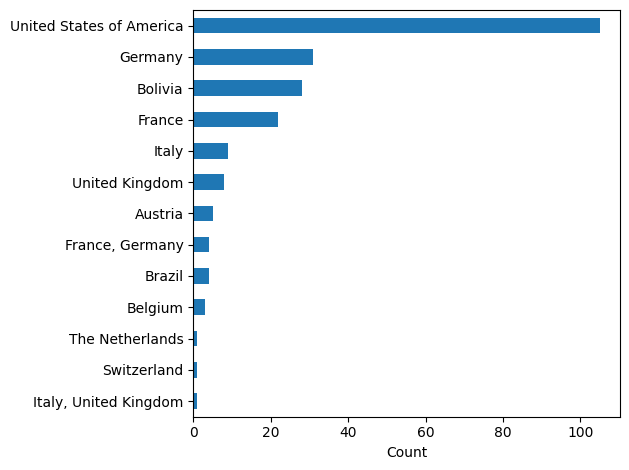

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Count occurrences of each unique string (descending order)
string_counts = df['country_holotype'].value_counts().sort_values(ascending=True)

# Plot the bar chart (horizontal or vertical based on your preference)
# Option 1: Horizontal bar chart (most frequent on top)
string_counts.plot(kind='barh')

# Option 2: Vertical bar chart (most frequent on top)
# string_counts.plot(kind='bar')  # Uncomment for vertical bars

# Customize the plot (optional)
#plt.title("")
plt.xlabel("Count")
# plt.ylabel("country_holotype")  # Optional to remove y-axis label for horizontal plot
plt.xticks(rotation=0)  # Remove x-axis tick rotation (optional)
plt.tight_layout()
plt.show()

       nr.    year                     original_name  \
0      NaN  1853.0                Acestra oxyrryncha   
1     15.0  1892.0  Crenicichla saxatilis semicincta   
2      NaN  1854.0               Hypostomus horridus   
3    198.0  1915.0                   Pygidium fassli   
4    167.0  1915.0                Xenocara boliviana   
..     ...     ...                               ...   
217   18.0  1972.0              Synbranchus madeirae   
218  197.0  1984.0          Trichomycterus duellmani   
219  204.0  1925.0             Tridentopsis pearsoni   
220  190.0  1918.0                Vandellia hasemani   
221    NaN  1937.0                Anostomus pearsoni   

                         author name_category                valid_name  \
0                     Kner 1853         valid     Farlowella oxyrryncha   
1             Steindachner 1892         valid      Saxatilia semicincta   
2                     Kner 1854         valid    Aphanotorulus horridus   
3             Steindachner 

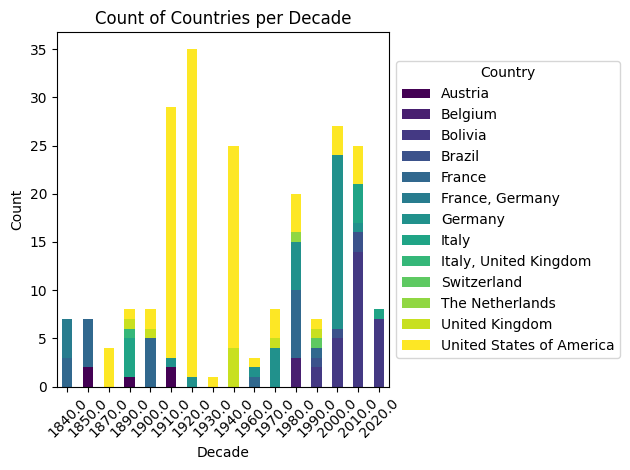

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a new 'decade' column by grouping years by decades
df['decade'] = df['year'] // 10 * 10  # Floor division for decades

def split_and_duplicate(df, column_name):
  for index, row in df.iterrows():
    value = row[column_name]
    if ', ' in value:
      new_value, other_value = value.split(', ', 1)
      # Create a DataFrame with a single row for the new value
      new_df = pd.DataFrame([[new_value]], columns=[column_name])
      # Concatenate the original row and the new DataFrame
      df = pd.concat([df.iloc[:index+1], new_df, df.iloc[index+1:]])
      # Alternatively, use df.insert(index + 1, column_name, other_value)
  return df

# Apply the function to the DataFrame
df1 = split_and_duplicate(df.copy(), 'country_holotype')
print(df1)

# Count occurrences per country within each decade
country_counts_per_decade = df1.groupby(['decade', 'country_holotype'])['year'].count().unstack()

# Create the stacked bar plot with legend beside the plot
fig, ax = plt.subplots()  # Create a figure and axes object
country_counts_per_decade.plot(kind='bar', stacked=True, colormap='viridis', ax=ax)  # Adjust colormap as desired

# Customize legend placement
handles, labels = ax.get_legend_handles_labels()  # Get legend elements
ax.legend(handles, labels, title="Country", loc='center left', bbox_to_anchor=(1, 0.5))  # Adjust placement

# Customize the plot (optional)
plt.title("Count of Countries per Decade")
plt.xlabel("Decade")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels to avoid overlapping decades
plt.tight_layout()
plt.show()

In [64]:
split_and_duplicate(df.copy(), 'country_holotype')

Austria
Austria
Austria
Austria
Austria
Belgium
Belgium
Belgium
Bolivia
Bolivia
Bolivia
Bolivia
Bolivia
Bolivia
Bolivia
Bolivia
Bolivia
Bolivia
Bolivia
Bolivia
Bolivia
Bolivia
Bolivia
Bolivia
Bolivia
Bolivia
Bolivia
Bolivia
Bolivia
Bolivia
Bolivia
Bolivia
Bolivia
Bolivia
Bolivia
Bolivia
Brazil
Brazil
Brazil
Brazil
France
France
France
France
France
France
France
France
France
France
France
France
France
France
France
France
France
France
France
France
France
France
France, Germany
France, Germany
France, Germany
France, Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Italy
Italy
Italy
Italy
Italy
Italy
Italy
Italy
Italy
Italy, United Kingdom
Switzerland
The Netherlands
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Ki